In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

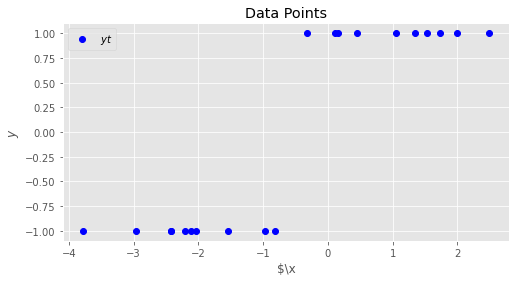

In [4]:
n=10
def normal(n):
    return np.random.randn(n)

plt.rcParams["figure.figsize"] = (8,4)
fig = plt.figure()
ax1=fig.subplots(1, 1)
ax1.set_xlabel(r'$\x')
ax1.set_ylabel(r'$y$')
ax1.set_title('Data Points')

x=np.concatenate((normal(n)-2,normal(n)+1),axis=None)
yt=np.ones(2*n)
yt[:n]=-1

ax1.plot(x,yt,'bo',label=r'$yt$')
ax1.legend()

Simple activation functions is $\sigma(z)$  function. 
Let sigmoid function is

\begin{eqnarray*}
\sigma(z)&=&\frac{1}{1+e^{-z}}\\
\end{eqnarray*}

and the derivative of sigmoid is
\begin{eqnarray*}
\sigma'(z)&=& \frac{d\sigma(z)}{dz} = \sigma(z) (1-\sigma(z))
\end{eqnarray*}

Another useful activation functions is $\tanh(z)$  function. 
Let sigmoid function is

\begin{eqnarray*}
\tanh(z)&=&\frac{e^z-e^{-z}}{e^z+e^{-z}}\\
\end{eqnarray*}

and the derivative of tanh is
\begin{eqnarray*}
tanh'(z)&=& \frac{d\tanh(z)}{dz} = 1-{tanh}(z)^2
\end{eqnarray*}

Let train a simple 1D ANN with activation function using
\begin{eqnarray*}
L&=&\frac{1}{2}\sum (yp_i-yt_i)^2\\
\theta_{t+1} &\gets& \theta_{t}-\alpha\frac{\partial L}{\partial \theta}\\
yp&=&f(wx+b)\\
yp&=&f(z)\\
z&=&wx+b
\end{eqnarray*}

Let perform GD on bias $b$ and $f()=tanh()$, so that
\begin{eqnarray*}
\frac{\partial L}{\partial b}&=&\frac{\partial L}{\partial yp}\frac{\partial yp}{\partial z}\frac{\partial z}{\partial b}\\
&=&(yp-yt)(1-yp^2)(1)
\end{eqnarray*}

Let perform GD on bias $w$ and $f()=tanh()$, so that
\begin{eqnarray*}
\frac{\partial L}{\partial w}&=&\frac{\partial L}{\partial yp}\frac{\partial yp}{\partial z}\frac{\partial z}{\partial w}\\
&=&(yp-yt)(1-yp^2)(x)
\end{eqnarray*}

0.0 0.0
0.5253129521340036 0.12055433285352353
0.666240766352492 0.2114880003619234
0.7603214938080973 0.280514510015318
0.8347138031311027 0.33555823893558606
0.8979093454387387 0.38103720567434957
0.953666102296657 0.41967294373627173
1.0039947882396392 0.45324417962878366
1.0501133094336377 0.4829621524968316
1.092826932097295 0.5096782190840916


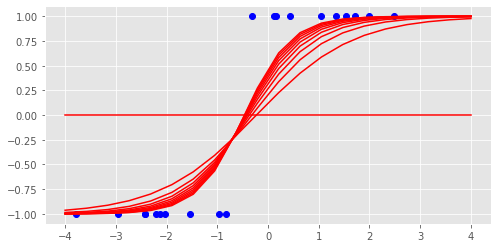

In [6]:
theta1 = 0.0
theta2 = 0.0
alpha =0.1

def yp(x):
    global theta1,theta2
    return np.tanh(theta1*x+theta2)

xm=np.linspace(-4,4,20)
plt.plot(x,yt,'bo')
for i in range(100):
    if i%10==0:
        print(theta1,theta2)
        plt.plot(xm,yp(xm),'r')
    theta1 = theta1 - alpha*np.average( (yp(x)-yt)*(1-yp(x)**2)*x )
    theta2 = theta2 - alpha*np.average( (yp(x)-yt)*(1-yp(x)**2) )